In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the datasets

df1 = pd.read_csv("data/tngross.csv")
df2 = pd.read_csv("data/tnproduction.csv")

In [19]:
df = df1.merge(df2, on="Unnamed: 0")

df = df.drop("Unnamed: 0", axis=1)

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%b %d, %Y')

# Create a function to change the format of the dollar amount values

def dollar_to_int(column):
    return column.str.replace('$', '').str.replace(',', '').map(int)

df[['production_budget', 'domestic_gross', 'worldwide_gross']] = df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(dollar_to_int)

df = df[~(df['worldwide_gross']==0)]

df['earnings'] = df["worldwide_gross"] - df["production_budget"]
df['earnings_ratio'] = df["worldwide_gross"] / df["production_budget"]

df = df[~df['release_date'].isna()]

df['year'] = pd.DatetimeIndex(df['release_date']).year

df['category'] = 'Profitable'
df.loc[df['earnings_ratio'] < 1, 'category'] = 'Non-Profitable'

In [63]:
century_df = df[df['year']>=2000]

In [65]:
century_df['genres'].value_counts()

Drama                  1192
Comedy                  732
Adventure               546
Action                  521
Thriller/Suspense       476
Horror                  327
Romantic Comedy         200
Documentary             104
Black Comedy             70
Musical                  56
None                     53
Western                  38
Concert/Performance      13
Multiple Genres           2
Name: genres, dtype: int64

In [ ]:
century_df = century_df[(century_df['genre']=='Drama') |
                        (century_df['genre']=='Comedy') |
                        (century_df['genre']=='Adventure') |
                        (century_df['genre']=='Action') |
                        (century_df['genre']=='Thriller/Suspense') |
                        (century_df['genre']=='Horror')]

In [66]:
decade_df = df[df['year']>=2010]

In [20]:
horror_df = df[df['genres']=='Horror']

In [21]:
others_df = df.copy()

In [22]:
others_df.loc[others_df['genres']!='Horror', 'genres'] = 'Other'

In [25]:
horror_df.sort_values('earnings', ascending=False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,earnings,earnings_ratio,year,category
1723,2017-08-31,It,35000000,328828874,701083042,135 minutes,Horror,"Lin Pictures, Vertigo Entertainment, KatzSmith...",United States,666083042,20.030944,2017,Profitable
3543,1975-06-20,Jaws,12000000,260000000,470700000,124 minutes,Horror,"Universal Pictures, Zancuk Company, David Brown",United States,458700000,39.225000,1975,Profitable
181,2007-12-14,I am Legend,150000000,256393010,585532684,100 minutes,Horror,"Village Roadshow Productions, Weed Road Pictur...",United States,435532684,3.903551,2007,Profitable
3544,1973-12-26,The Exorcist,12000000,230347346,428214478,121 minutes,Horror,Warner Bros.,United States,416214478,35.684540,1973,Profitable
744,2019-09-04,It: Chapter Two,70000000,211593228,469566806,169 minutes,Horror,"New Line Cinema, Vertigo Entertainment, Rideba...",United States,399566806,6.708097,2019,Profitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,2002-08-30,FearDotCom,40000000,13208023,13289290,101 minutes,Horror,None,None,-26710710,0.332232,2002,Non-Profitable
1128,1998-10-16,Beloved,53000000,22852487,22852487,171 minutes,Horror,None,United States,-30147513,0.431179,1998,Non-Profitable
991,1997-08-15,Event Horizon,60000000,26673242,26673953,95 minutes,Horror,"Paramount Pictures, Lawrence Gordon, Golar",United States,-33326047,0.444566,1997,Non-Profitable
662,2004-08-20,Exorcist: The Beginning,78000000,41814863,43957541,114 minutes,Horror,Morgan Creek Productions,"Italy, Morocco",-34042459,0.563558,2004,Non-Profitable


In [26]:
horror_df['category'].value_counts()

Profitable        353
Non-Profitable     96
Name: category, dtype: int64

In [ ]:
horror_years_df = horror_df.groupby('year', as_index=False).count()

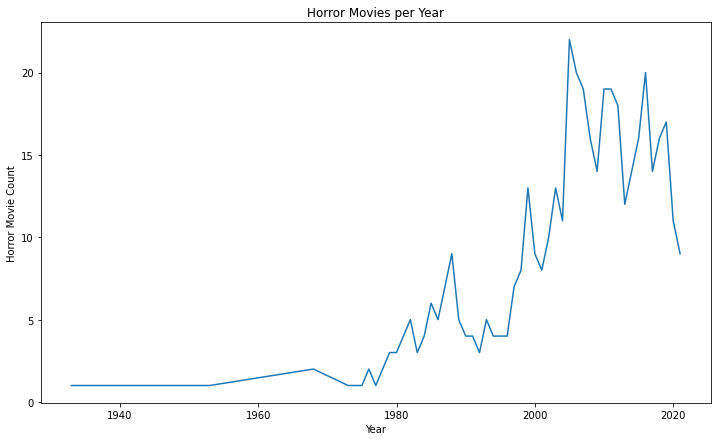

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.lineplot(
    x="year", 
    y="movie",
    data = horror_years_df,)
plt.title("Horror Movies per Year")
plt.xlabel("Year")
plt.ylabel("Horror Movie Count")

plt.show()

In [62]:
horror_df.groupby('year', as_index=False)['movie'].count()

,year,movie
0,1933,1
1,1953,1
2,1968,2
3,1973,1
4,1974,1
5,1975,1
6,1976,2
7,1977,1
8,1978,2
9,1979,3


In [53]:
horror_gross_df = horror_df.groupby('year', as_index=False).median()

In [57]:
horror_gross_df

,year,production_budget,domestic_gross,worldwide_gross,earnings,earnings_ratio
0,1933,672000.0,10000000.0,10001782.0,9329782.0,14.883604
1,1953,658000.0,23800000.0,23800000.0,23142000.0,36.170213
2,1968,1657000.0,22741245.0,31741902.0,30084902.0,137.179048
3,1973,12000000.0,230347346.0,428214478.0,416214478.0,35.684540
4,1974,140000.0,26572439.0,26572439.0,26432439.0,189.803136
5,1975,12000000.0,260000000.0,470700000.0,458700000.0,39.225000
6,1976,2300000.0,37224519.0,37231980.5,34931980.5,15.865244
7,1977,14000000.0,25011000.0,25011000.0,11011000.0,1.786500
8,1978,10162500.0,75098188.0,139587188.0,129424688.0,113.336356
9,1979,10700000.0,22673340.0,55000000.0,53500000.0,17.261214


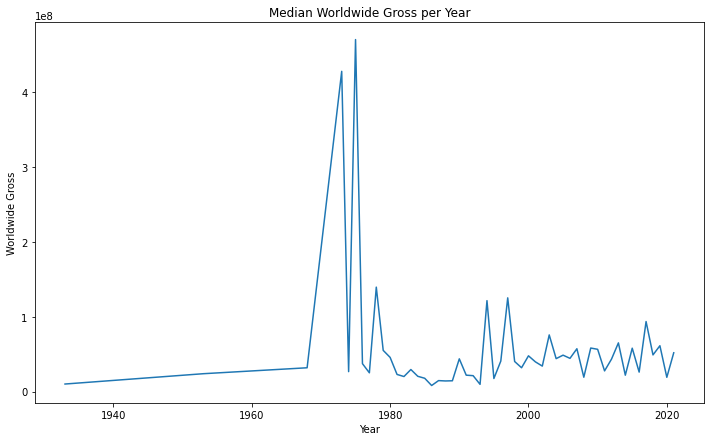

In [56]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.lineplot(
    x="year", 
    y="worldwide_gross",
    data = horror_gross_df,)
plt.title("Median Worldwide Gross per Year")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross")

plt.show()

In [ ]:
# fig, ax = plt.subplots()

# sns.lineplot(
#     x="year", 
#     color="#F34F1C",
#     data = horror_df,)
# plt.title("Non-Profitable Horror Movies per Month")
# plt.xlabel("Month")
# plt.ylabel("Horror Movie Count")

# plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

# plt.show()